In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona

# set working directory
os.chdir('/Users/Naif Khaled/Documents/GitHub/COGCC-Risk-Analysis/Data')

In [2]:
data = pd.read_excel('flowlines_to_spills_mod2.xlsx')

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OPERATOR_NUM         343 non-null    int64  
 1   LOCATIONTYPE         343 non-null    object 
 2   FACILITY_NAME        343 non-null    object 
 3   LAT                  343 non-null    float64
 4   LONG                 343 non-null    float64
 5   FLOWLINEID           338 non-null    float64
 6   FLOWLINETYPE         343 non-null    object 
 7   ENDEQUIPTYPE         343 non-null    object 
 8   TYPEOFSTARTLOCATION  343 non-null    object 
 9   STARTEQUIPTYPE       343 non-null    object 
 10  Line Age             343 non-null    float64
 11  PIPEMATERIAL         343 non-null    object 
 12  MAXOD                343 non-null    float64
 13  TYPEOFFLUIDTRANS     343 non-null    object 
 14  Risk                 343 non-null    object 
dtypes: float64(5), int64(1), object(9)
memor

# Dataset


In [4]:
data.describe()

,OPERATOR_NUM,LAT,LONG,FLOWLINEID,Line Age,MAXOD
count,343.000000,343.000000,343.000000,338.000000,343.000000,343.000000
mean,31528.172012,39.486489,-104.921747,471404.230769,20.218891,6.486662
std,29857.124039,1.353392,1.170896,6125.091676,11.939399,27.076073
min,8960.000000,37.051994,-109.031397,457197.000000,4.621918,1.000000
25%,10633.000000,39.432771,-104.925640,465996.250000,12.915068,2.000000
50%,10672.000000,40.107721,-104.859249,473019.000000,17.150685,3.000000
75%,47120.000000,40.367830,-104.532353,474791.750000,23.416438,9.000000
max,100322.000000,40.973774,-102.180446,485633.000000,66.821918,500.000000


In [5]:
print(data)

     OPERATOR_NUM           LOCATIONTYPE                        FACILITY_NAME  \
0           74165  Production Facilities  SARTI-66S63W                          
1           74165  Production Facilities  SARTI-66S63W                          
2           46290  Production Facilities  GRANT                                 
3           10633  Production Facilities  GRANT                                 
4           46290  Production Facilities  GRANT                                 
..            ...                    ...                                  ...   
338         10575  Production Facilities  DF RANCH                              
339         10575  Production Facilities  DF RANCH                              
340         10575  Production Facilities  DF RANCH-611N61W                      
341         10575  Production Facilities  DF RANCH-611N61W                      
342         10575  Production Facilities  DF RANCH-611N61W                      

           LAT        LONG 

# Turning text columns into numbers

In [27]:
data_transformed = pd.get_dummies(data, columns=['OPERATOR_NUM', 'LOCATIONTYPE', 'FACILITY_NAME', 'FLOWLINEID', 'FLOWLINETYPE', 'ENDEQUIPTYPE', 'TYPEOFSTARTLOCATION', 'STARTEQUIPTYPE', 'PIPEMATERIAL', 'TYPEOFFLUIDTRANS'])

for col in data_transformed.columns:
    if pd.api.types.is_numeric_dtype(data_transformed[col]):
        data_transformed[col] = data_transformed[col].astype(int)
    else:
        # Handle or report non-numeric columns
        print(f"Column {col} is not numeric.")

data_transformed['Risk'] = data_transformed['Risk'].map({'H': 1, 'L': 0})

print(data_transformed)

Column Risk is not numeric.
     LAT  LONG  Line Age  MAXOD  Risk  OPERATOR_NUM_8960  OPERATOR_NUM_10112  \
0     39  -104        46      3     1                  0                   0   
1     39  -104        46      3     1                  0                   0   
2     40  -104        45      3     1                  0                   0   
3     40  -104        45      3     1                  0                   0   
4     40  -104        45      3     1                  0                   0   
..   ...   ...       ...    ...   ...                ...                 ...   
338   40  -104        13      3     0                  0                   0   
339   40  -104        13      2     0                  0                   0   
340   40  -104        14      2     0                  0                   0   
341   40  -104        14      2     0                  0                   0   
342   40  -104        14      2     0                  0                   0   

     OPERAT

# Some Visualizations

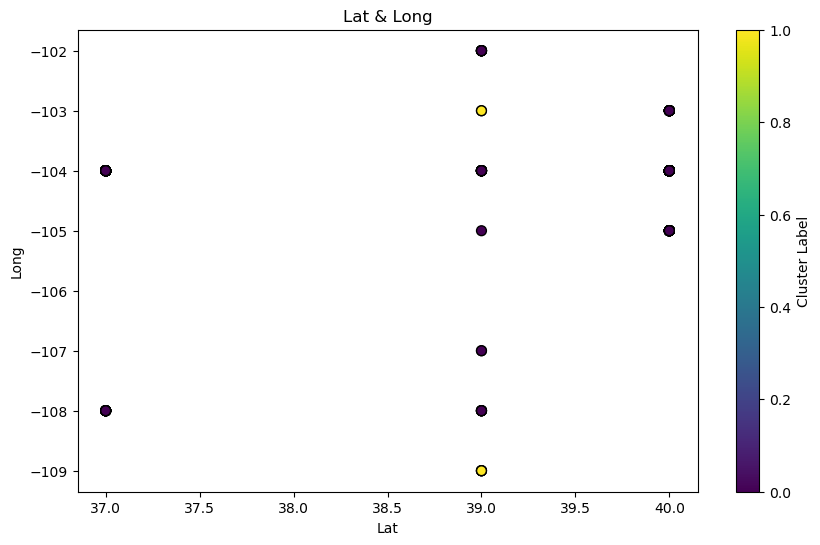

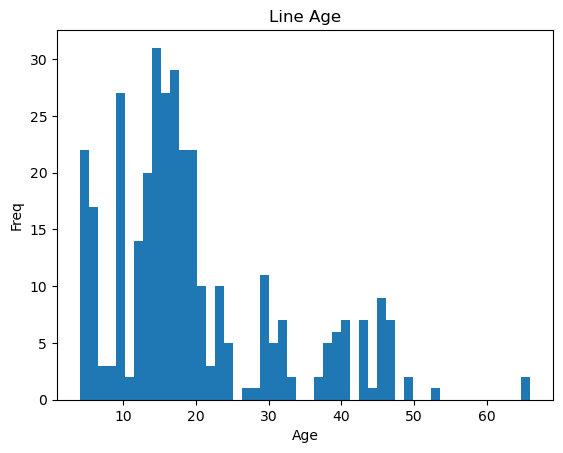

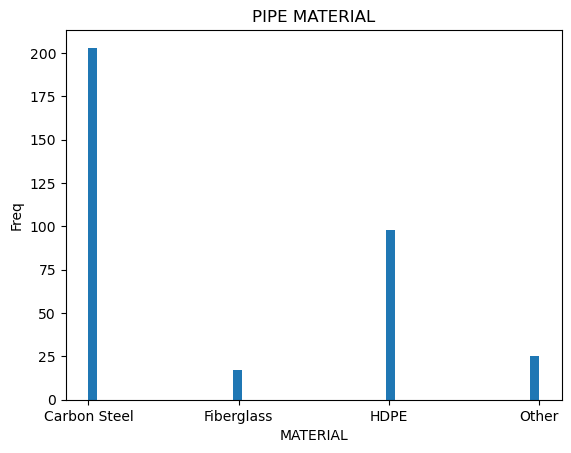

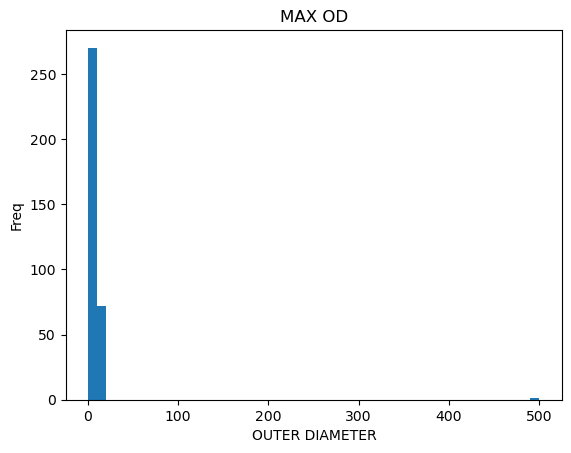

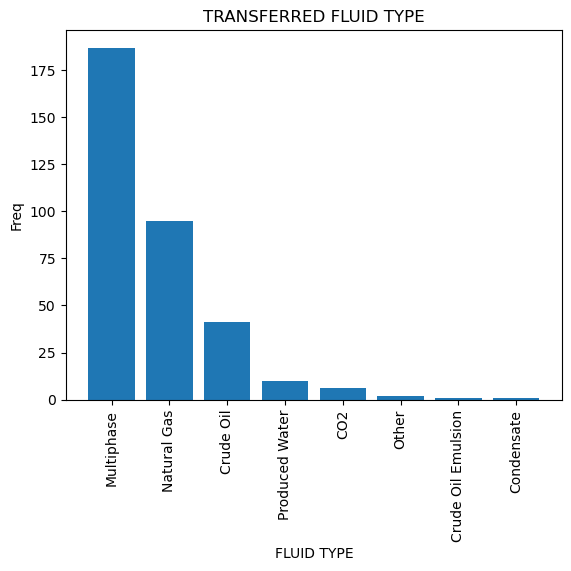

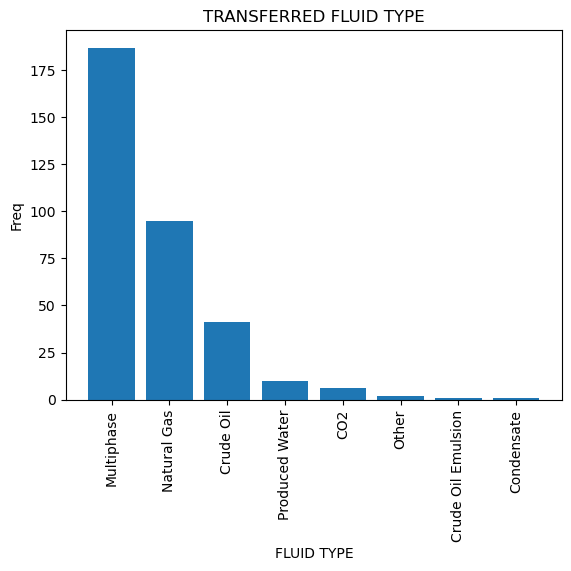

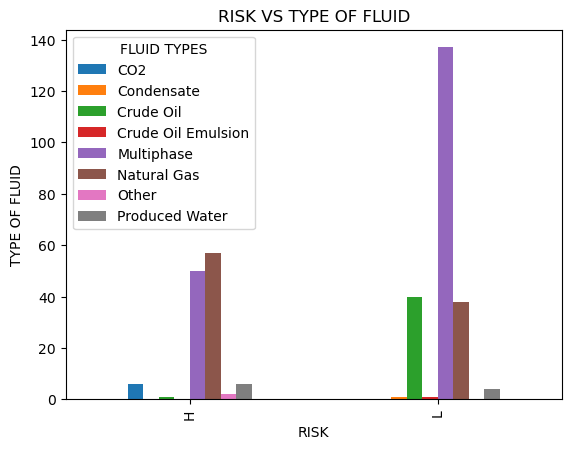

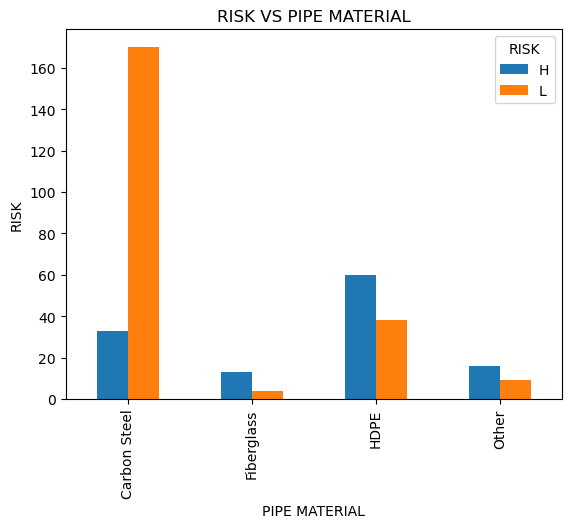

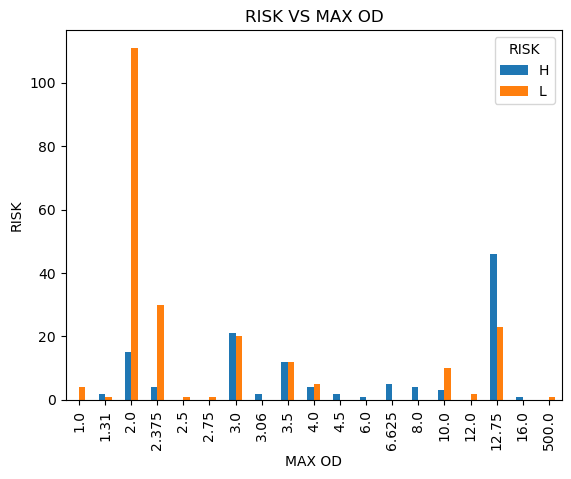

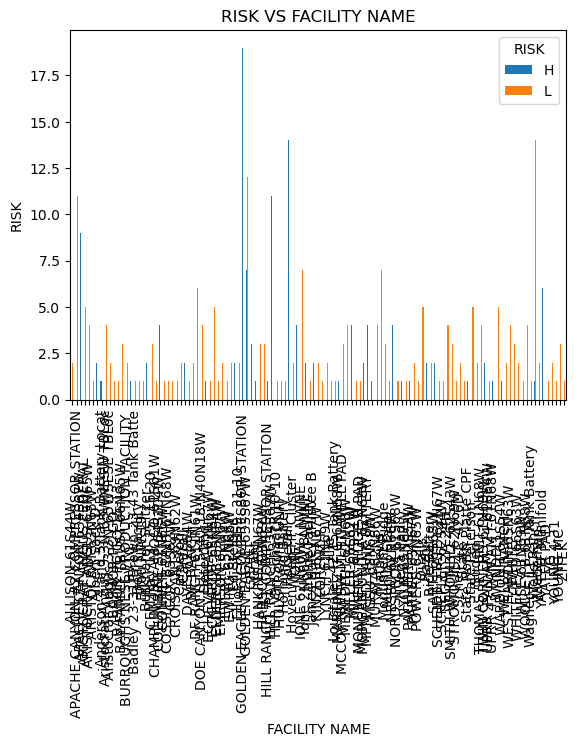

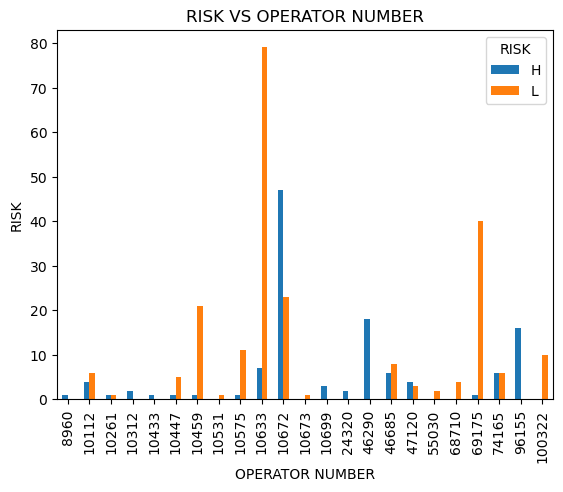

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data_transformed['LAT'], data_transformed['LONG'], c=data_transformed['Risk'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('Lat & Long')
plt.colorbar(label='Cluster Label')
plt.show()




plt.hist(data_transformed['Line Age'], bins=50)
plt.xlabel('Age'); plt.ylabel('Freq'); plt.title('Line Age')
plt.show()

plt.hist(data['PIPEMATERIAL'], bins=50)
plt.xlabel('MATERIAL'); plt.ylabel('Freq'); plt.title('PIPE MATERIAL')
plt.show()

plt.hist(data['MAXOD'], bins=50)
plt.xlabel('OUTER DIAMETER'); plt.ylabel('Freq'); plt.title('MAX OD')
plt.show()


category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()



category_counts = data['TYPEOFFLUIDTRANS'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('FLUID TYPE')
plt.ylabel('Freq')
plt.title('TRANSFERRED FLUID TYPE')
plt.xticks(rotation=90) 
plt.show()




counts = data.groupby(['Risk', 'TYPEOFFLUIDTRANS']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='Risk', columns='TYPEOFFLUIDTRANS', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('RISK')
plt.ylabel('TYPE OF FLUID') 
plt.title('RISK VS TYPE OF FLUID') 
plt.legend(title='FLUID TYPES')
plt.show()

counts = data.groupby(['PIPEMATERIAL', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='PIPEMATERIAL', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('PIPE MATERIAL')
plt.ylabel('RISK') 
plt.title('RISK VS PIPE MATERIAL') 
plt.legend(title='RISK')
plt.show()



counts = data.groupby(['MAXOD', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='MAXOD', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('MAX OD')
plt.ylabel('RISK') 
plt.title('RISK VS MAX OD') 
plt.legend(title='RISK')
plt.show()


counts = data.groupby(['FACILITY_NAME', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='FACILITY_NAME', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('FACILITY NAME')
plt.ylabel('RISK') 
plt.title('RISK VS FACILITY NAME') 
plt.legend(title='RISK')
plt.show()

counts = data.groupby(['OPERATOR_NUM', 'Risk']).size().reset_index(name='counts')
pivot_counts = counts.pivot(index='OPERATOR_NUM', columns='Risk', values='counts')

pivot_counts.plot(kind='bar', stacked=False)
plt.xlabel('OPERATOR NUMBER')
plt.ylabel('RISK') 
plt.title('RISK VS OPERATOR NUMBER') 
plt.legend(title='RISK')
plt.show()


# Machine Learning Models (Non-Transformed Data)

In [29]:
inputs = data_transformed.drop('Risk', axis=1)
target = data_transformed['Risk']

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(inputs, target, test_size = 0.3)

X = np.asarray(trainX)
y = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

# 1-Logistic Regression

C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy:  0.883495145631068


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

F1 Scores:  [0.88888889 0.89361702 0.91304348 0.84444444 0.69565217]
F1 Scores Mean 0.8471292013567684
F1 Scores STD:  0.07899642848424786


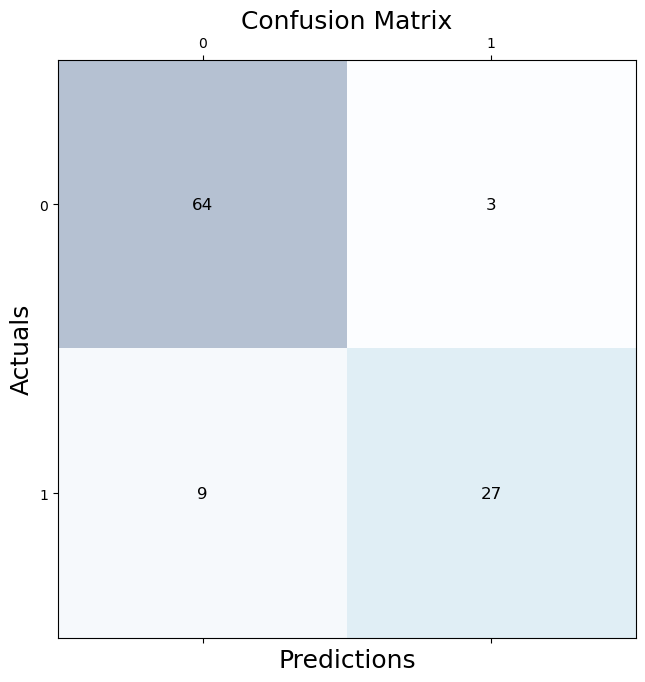

              precision    recall  f1-score   support

           0       0.88      0.96      0.91        67
           1       0.90      0.75      0.82        36

    accuracy                           0.88       103
   macro avg       0.89      0.85      0.87       103
weighted avg       0.88      0.88      0.88       103



In [30]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

#create a model object
model = linear_model.LogisticRegression()
model.fit(X, y)

#train the model
y_hat = model.predict(testX)

#evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

#setup to get f-score and cross validation
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean', scores.mean())
print('F1 Scores STD: ', scores.std())

#confusion matrix
conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#classification report
print(classification_report(testY, model.predict(testX)))

# 2-K-Nearest Neigbor

0.8252427184466019


C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File 

[nan nan nan nan nan]
nan
nan


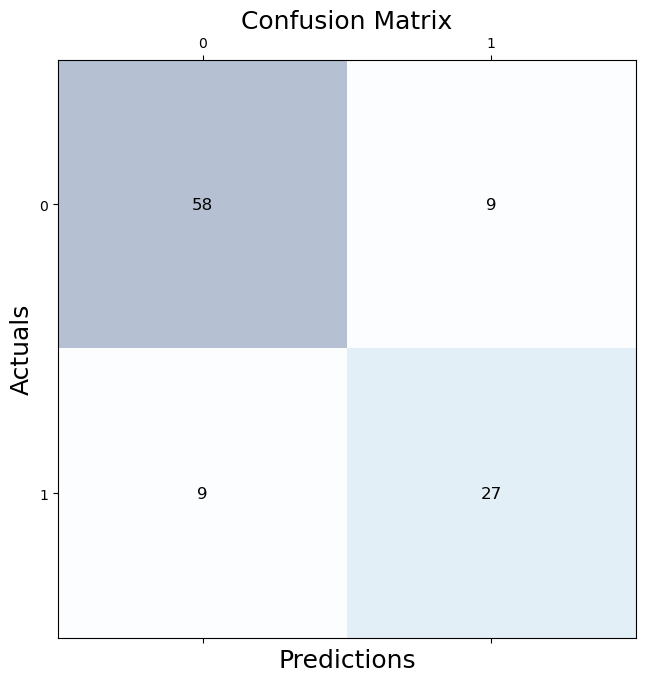

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        67
           1       0.75      0.75      0.75        36

    accuracy                           0.83       103
   macro avg       0.81      0.81      0.81       103
weighted avg       0.83      0.83      0.83       103



In [31]:


from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = neighbors.KNeighborsClassifier(k)
model.fit(X,y)

y_hat = model.predict(testX)

accuracy = model.score(testX, testY)
print(accuracy)


#Cross Validation
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print(scores)
print(scores.mean())
print(scores.std())

#Confusion Matrix
conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Classification Report
print(classification_report(testY, model.predict(testX)))

# 3-Support Vector Machine

Accuracy:  0.6407766990291263
F1 Scores:  [0.52173913 0.56410256 0.46153846 0.5        0.5       ]
F1 Scores Mean 0.5094760312151616
F1 Scores STD:  0.03350236594468709


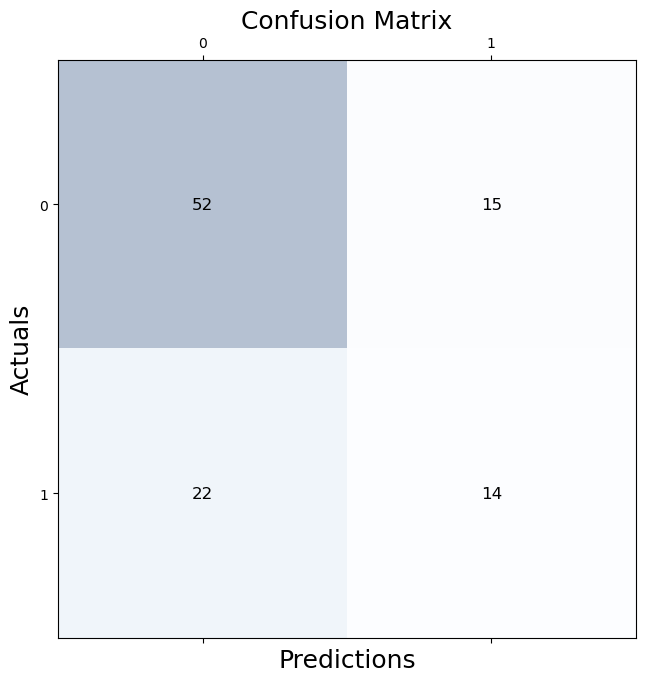

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        67
           1       0.48      0.39      0.43        36

    accuracy                           0.64       103
   macro avg       0.59      0.58      0.58       103
weighted avg       0.63      0.64      0.63       103



In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#create a model object

model = svm.SVC(kernel='rbf', C=10)
model.fit(X, y)

#train our model
y_hat = model.predict(testX)


#evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

#setup to get f-score and cv
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv = StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean', scores.mean())
print('F1 Scores STD: ', scores.std())

#confusion matrix

conf_matrix = sk.metrics.confusion_matrix(testY, model.predict(testX))
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#classification report
print(classification_report(testY, model.predict(testX)))

# Ensemble Models

# 1- Gradient Boosting Decision Trees

Accuracy:  0.8932038834951457
F1 Scores:  [0.85106383 0.86956522 0.88888889 0.95652174 0.875     ]
F1 Scores Mean:  0.8882079350395724
F1 Scores STD:  0.036246170975232736


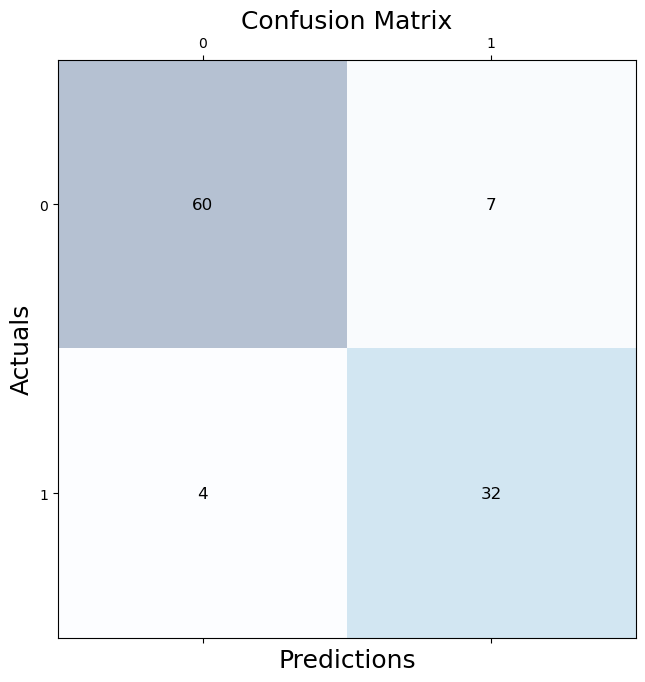

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.82      0.89      0.85        36

    accuracy                           0.89       103
   macro avg       0.88      0.89      0.88       103
weighted avg       0.90      0.89      0.89       103



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create a Gradient Boosting model object
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 2-AdaBoost

Accuracy:  0.883495145631068
F1 Scores:  [0.91666667 0.85185185 0.88372093 0.89795918 0.7804878 ]
F1 Scores Mean:  0.866137287460519
F1 Scores STD:  0.04778063053551176


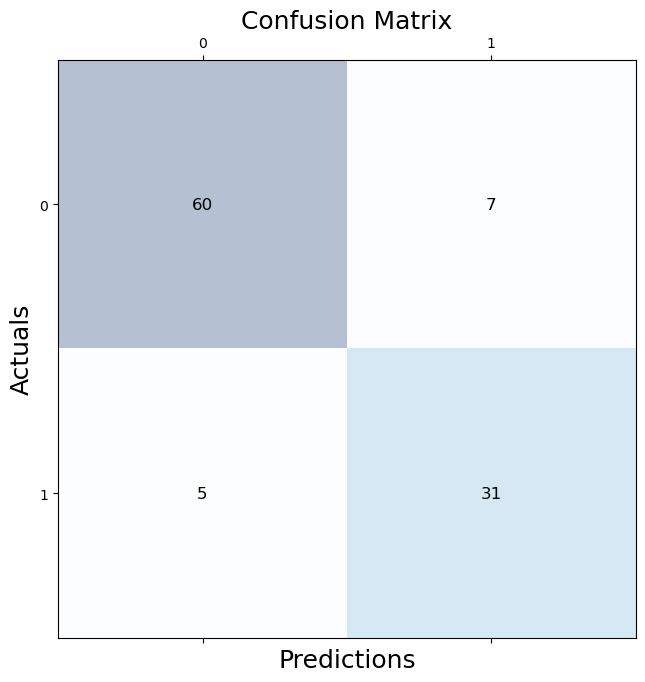

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.82      0.86      0.84        36

    accuracy                           0.88       103
   macro avg       0.87      0.88      0.87       103
weighted avg       0.89      0.88      0.88       103



In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create an AdaBoost model object
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 3-Random Forests

Accuracy:  0.9223300970873787
F1 Scores:  [0.93877551 0.88888889 0.875      0.85714286 0.93877551]
F1 Scores Mean:  0.899716553287982
F1 Scores STD:  0.033442099685820945


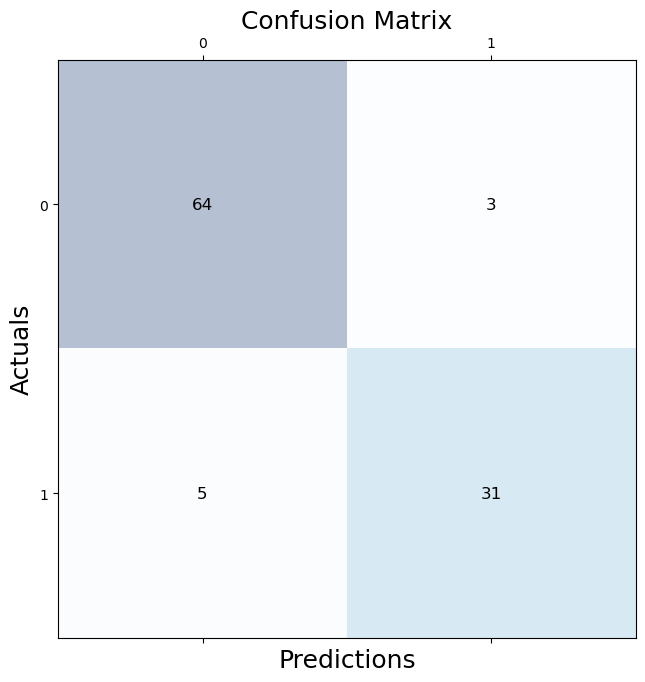

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.91      0.86      0.89        36

    accuracy                           0.92       103
   macro avg       0.92      0.91      0.91       103
weighted avg       0.92      0.92      0.92       103



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create a Random Forest model object
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and Cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean: ', scores.mean())
print('F1 Scores STD: ', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# ML Models (PCA Dimensionality Reduction)

Explained variance ratio: [0.86784675 0.12443066]
Total explained variance ratio: 0.9922774099904956
Accuracy:  0.6019417475728155
F1 Scores:  [0.         0.34146341 0.15384615 0.         0.08      ]
F1 Scores Mean: 0.11506191369606004
F1 Scores STD: 0.12686187975106436


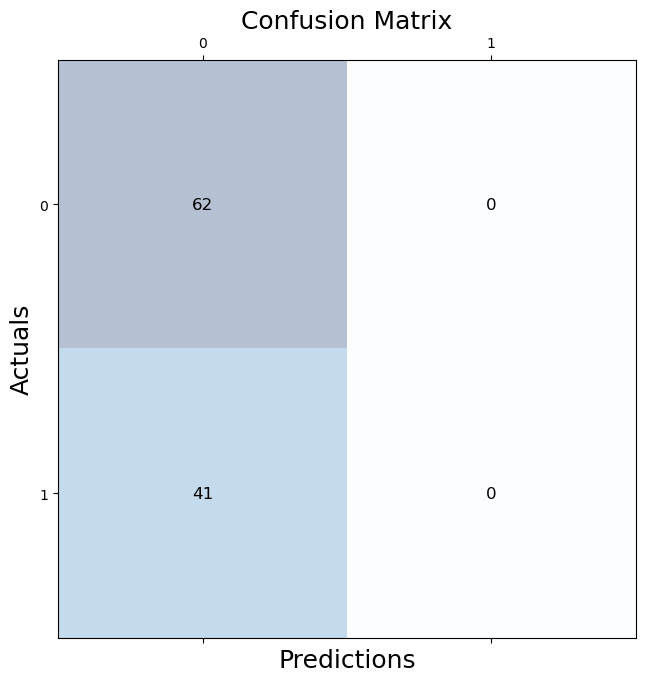

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        62
           1       0.00      0.00      0.00        41

    accuracy                           0.60       103
   macro avg       0.30      0.50      0.38       103
weighted avg       0.36      0.60      0.45       103



C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naif Khaled\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
import matplotlib.pyplot as plt
import sklearn as sk

# Split the data
inputs = data_transformed.drop('Risk', axis=1)
target = data_transformed['Risk']
trainX, testX, trainY, testY = train_test_split(inputs, target, test_size=0.3, random_state=42)

# Define PCA with 6 components
pca = PCA(n_components=2)

# Create a logistic regression model
logistic = LogisticRegression(max_iter=1000)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Train the model
model.fit(trainX, trainY)

# Print the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance ratio:", sum(pca.explained_variance_ratio_))

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# 2-K-Nearest Neighbor

Accuracy:  0.7475728155339806
F1 Scores:  [0.73684211 0.50980392 0.70588235 0.65116279 0.76595745]
F1 Scores Mean: 0.6739297234558295
F1 Scores STD: 0.09044739051350022


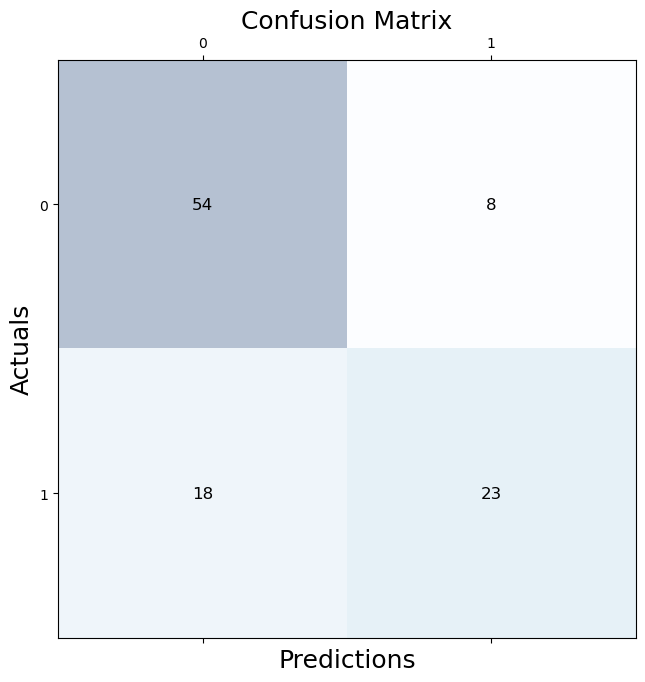

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        62
           1       0.74      0.56      0.64        41

    accuracy                           0.75       103
   macro avg       0.75      0.72      0.72       103
weighted avg       0.75      0.75      0.74       103



In [37]:
pca = PCA(n_components=2)

# Create a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('knn', knn)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))

# 3-Support Vector Machine

Accuracy:  0.6990291262135923
F1 Scores:  [0.56521739 0.58181818 0.52380952 0.63829787 0.60465116]
F1 Scores Mean: 0.5827588264126353
F1 Scores STD: 0.03833397200907824


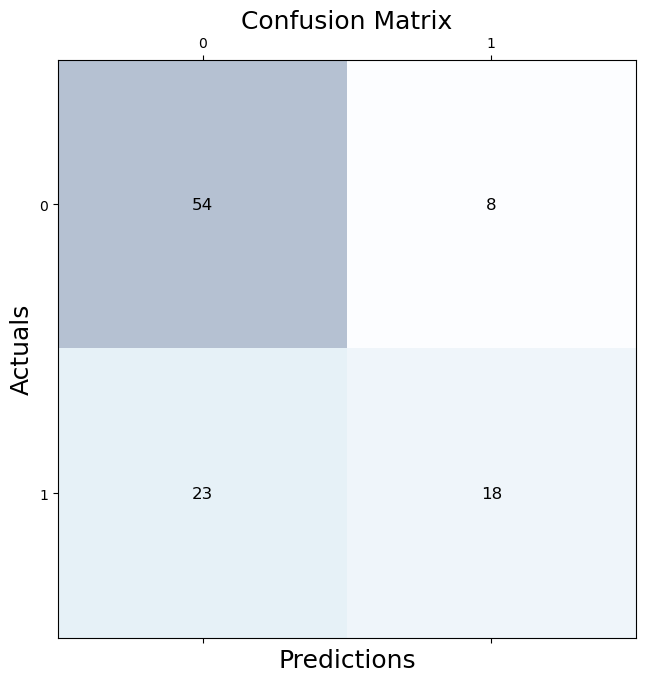

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        62
           1       0.69      0.44      0.54        41

    accuracy                           0.70       103
   macro avg       0.70      0.65      0.66       103
weighted avg       0.70      0.70      0.68       103



In [38]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create a Support Vector Machine model
svm = SVC(kernel='rbf', C=1.0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('svm', svm)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


Accuracy:  0.7766990291262136
F1 Scores:  [0.84615385 0.69090909 0.73913043 0.60465116 0.7826087 ]
F1 Scores Mean: 0.7326906460576834
F1 Scores STD: 0.08191091252832329


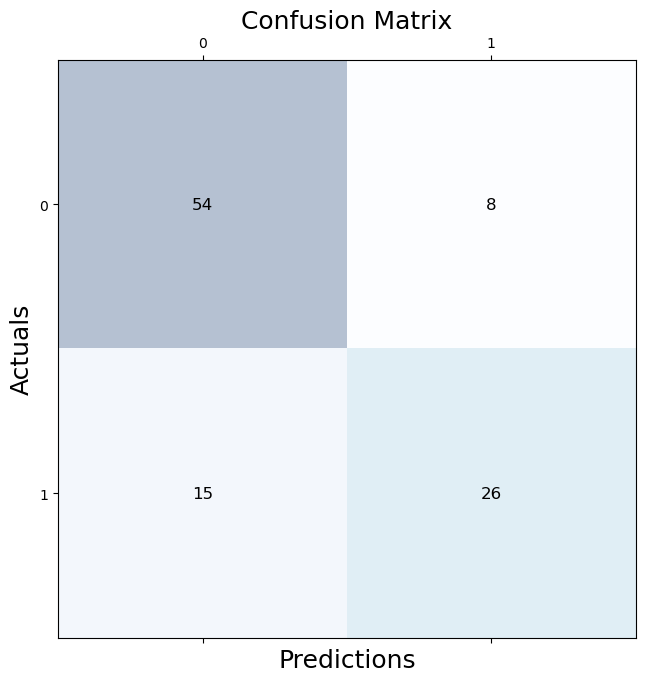

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        62
           1       0.76      0.63      0.69        41

    accuracy                           0.78       103
   macro avg       0.77      0.75      0.76       103
weighted avg       0.78      0.78      0.77       103



In [39]:
# Define PCA with 6 components
pca = PCA(n_components=2)

# Create a Gradient Boosting classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('gbdt', gbdt)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# AdaBoost

Accuracy:  0.7572815533980582
F1 Scores:  [0.75471698 0.73333333 0.71111111 0.58536585 0.7826087 ]
F1 Scores Mean: 0.7134271949774462
F1 Scores STD: 0.06825284200005194


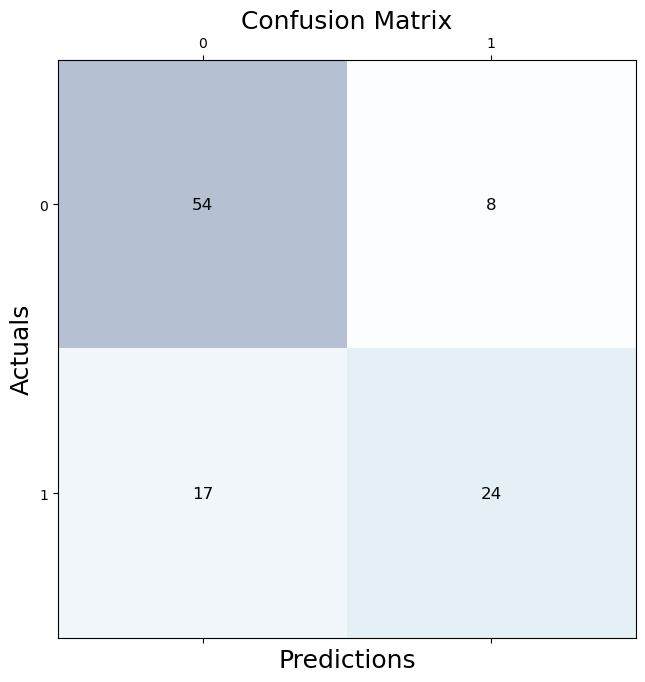

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        62
           1       0.75      0.59      0.66        41

    accuracy                           0.76       103
   macro avg       0.76      0.73      0.73       103
weighted avg       0.76      0.76      0.75       103



In [40]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create an AdaBoost classifier
# The default base estimator is DecisionTreeClassifier initialized with max_depth=1
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('adaboost', adaboost)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# Random Forests

Accuracy:  0.8155339805825242
F1 Scores:  [0.76923077 0.73076923 0.80851064 0.51162791 0.86956522]
F1 Scores Mean: 0.7379407525331841
F1 Scores STD: 0.12210905655128673


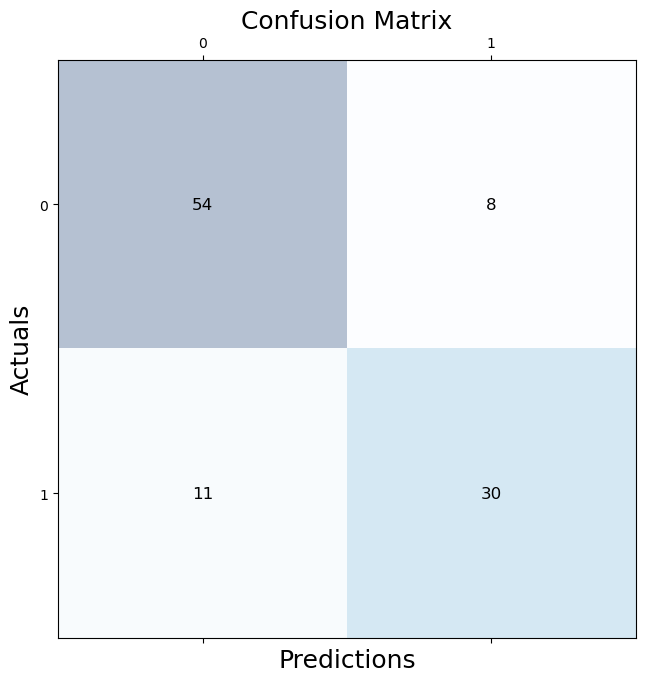

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.79      0.73      0.76        41

    accuracy                           0.82       103
   macro avg       0.81      0.80      0.80       103
weighted avg       0.81      0.82      0.81       103



In [41]:
# Define PCA with 2 components
pca = PCA(n_components=2)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Create a pipeline
model = Pipeline(steps=[('pca', pca), ('random_forest', random_forest)])

# Train the model
model.fit(trainX, trainY)

# Predictions
y_hat = model.predict(testX)

# Evaluate the model
accuracy = model.score(testX, testY)
print('Accuracy: ', accuracy)

# Setup to get F-score and cross-validation scores
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, inputs, target, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scorerVar)
print('F1 Scores: ', scores)
print('F1 Scores Mean:', scores.mean())
print('F1 Scores STD:', scores.std())

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_hat)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(testY, y_hat))


# ML Models (Other Dimensionality Reduction Methods) [Future Work]